In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Загружаем данные в dataframe
# df = pd.read_csv("data/Animals2.csv", sep=",", index_col='name')
df = pd.read_csv("data/Animals2.csv", sep=",")

In [9]:
# Визуализация загруженной таблицы
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
...,...,...,...
60,Brazilian tapir,160.000,169.0
61,Tenrec,0.900,2.6
62,Phalanger,1.620,11.4
63,Tree shrew,0.104,2.5


In [10]:
# Выделяем колонки с весом тела, массой мозга и наименованиями
body_col = df['body']
brain_col = df['brain']
name_col = df['name']

In [11]:
print(type(df))
print(type(body_col))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
# Выделяем массивы значений (numpy arrays), содержащихся в колонках
body_data = body_col.values
brain_data = brain_col.values
names = name_col.values

In [13]:
print(body_data)

[1.350e+00 4.650e+02 3.633e+01 2.766e+01 1.040e+00 1.170e+04 2.547e+03
 1.871e+02 5.210e+02 1.000e+01 3.300e+00 5.290e+02 2.070e+02 6.200e+01
 6.654e+03 9.400e+03 6.800e+00 3.500e+01 1.200e-01 2.300e-02 2.500e+00
 5.550e+01 1.000e+02 5.216e+01 2.800e-01 8.700e+04 1.220e-01 1.920e+02
 3.385e+00 4.800e-01 1.483e+01 4.190e+00 4.250e-01 1.010e-01 9.200e-01
 1.000e+00 5.000e-03 6.000e-02 3.500e+00 2.000e+00 1.700e+00 2.300e-02
 7.850e-01 2.000e-01 1.410e+00 8.500e+01 7.500e-01 3.500e+00 4.050e+00
 1.000e-02 1.400e+00 2.500e+02 1.055e+01 5.500e-01 6.000e+01 3.600e+00
 4.288e+00 7.500e-02 4.800e-02 3.000e+00 1.600e+02 9.000e-01 1.620e+00
 1.040e-01 4.235e+00]


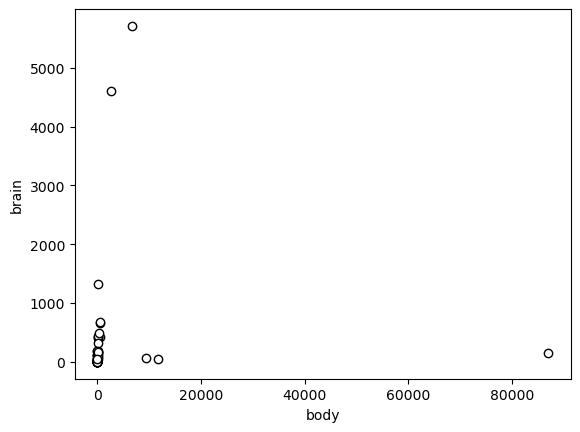

In [14]:
# Визуализируем данные
# plt.figure(figsize=(8,4))
plt.scatter(body_data, brain_data, c='w', edgecolors='k')
plt.xlabel('body')
plt.ylabel('brain')
plt.show()

In [15]:
# Логарифмируем массы, так как они занимают несколько масштабов значений
brain_data_log = np.log(brain_data)
body_data_log = np.log(body_data)

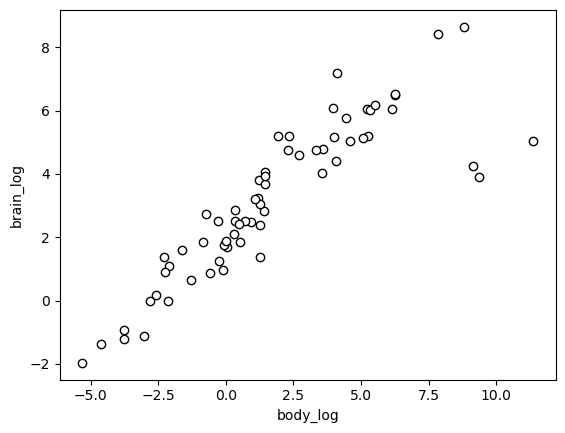

In [16]:
# Визуализируем и видим линейный характер зависимости
plt.scatter(body_data_log, brain_data_log, c='w', edgecolors='k')
plt.xlabel('body_log')
plt.ylabel('brain_log')
plt.show()

In [17]:
# Загружаем модуль для линейной модели регрессии
import sklearn.linear_model as linear_model

In [19]:
# Вводим стандартные имена: X -- обучающая таблица, Y -- массив значений на выходе
X = body_data_log
Xs = X[:,None]
Y = brain_data_log
print(X.shape, Xs.shape)

(65,) (65, 1)


In [20]:
# Создаем экземпляо класса, который восстанавливает линейную регресси при помощи МНК
lrgr = linear_model.LinearRegression()

In [21]:
# Вызываем метод обучения
lrgr.fit(Xs, Y)

LinearRegression()

In [22]:
# Коэффициенты линейной модели при коэффициентах
print(lrgr.coef_)

[0.59151984]


In [23]:
# Константа смещения
print(lrgr.intercept_)

2.1716854571040893


In [26]:
# Вызываем метод для вычислинения значений на обучающей выборке при помощи обученной линейной модели
Y_p = lrgr.predict(Xs)

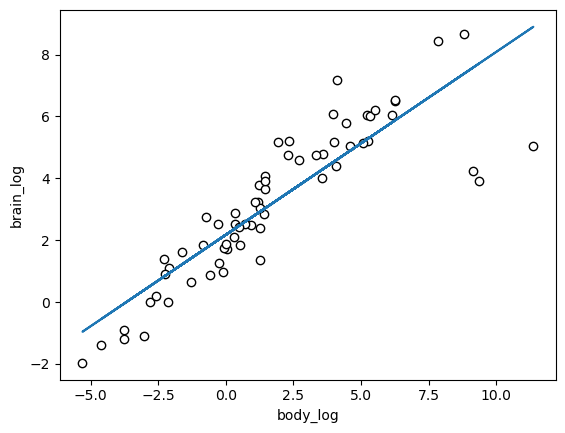

In [27]:
# Визуализируем линейную зависимость (видим некоторое отклонение прямой в сторону трех точек)
# plt.figure(figsize=(10,6))
plt.scatter(body_data_log, brain_data_log, c='w', edgecolors='k')
plt.plot(X, Y_p)
plt.ylabel('brain_log')
plt.xlabel('body_log')
plt.show()

In [28]:
# Вычисляем абсолютные значения ошибок и сортируем их в порядке возрастания
E = np.abs(Y - Y_p)
E.sort()

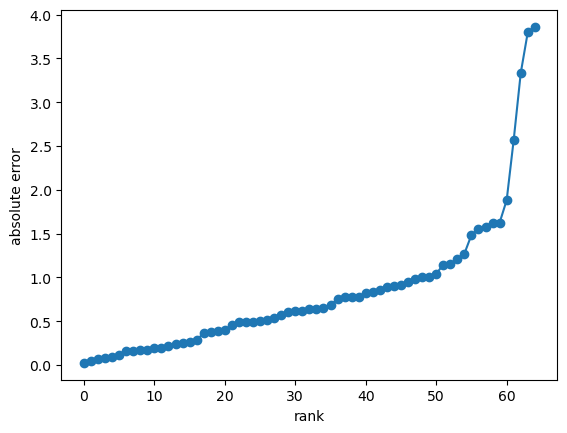

In [29]:
# Визуализируем (ранговое) распределение абсолютных значений ошибок
# и видим "подскок" кривой, который сигнализирует о возможном присутствии "выбросов"
# plt.figure(figsize=(8,5))
plt.plot(E, marker='o')
plt.xlabel('rank')
plt.ylabel('absolute error')
plt.show()

In [39]:
E = np.abs(Y - Y_p)
I = E.argsort()
E = E[I]
Xs_wo = Xs[ I[:-4] ]
Y_wo = Y[ I[:-4] ]

In [31]:
lrgr_wo = linear_model.LinearRegression()

In [32]:
lrgr_wo.fit(Xs_wo, Y_wo)

LinearRegression()

In [33]:
Y_wo_p = lrgr_wo.predict(Xs)

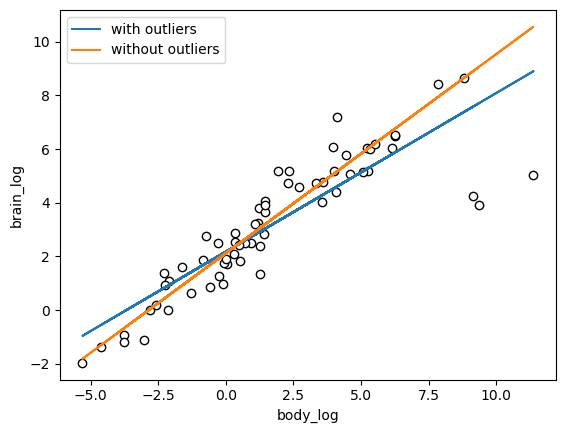

In [34]:
# plt.figure(figsize=(9,5))
plt.scatter(body_data_log, brain_data_log, c='w', edgecolors='k')
plt.plot(X, Y_p, label='with outliers')
plt.plot(X, Y_wo_p, label='without outliers')
plt.ylabel('brain_log')
plt.xlabel('body_log')
plt.legend()
plt.show()

In [37]:
E_wo = np.abs(Y - Y_wo_p)
E_wo.sort()

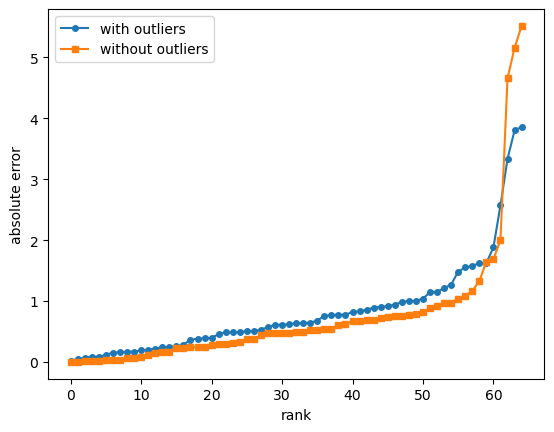

In [40]:
# plt.figure(figsize=(9,5))
plt.plot(E, marker='o', markersize=4, label='with outliers')
plt.plot(E_wo, marker='s', markersize=4, label='without outliers')
plt.xlabel('rank')
plt.ylabel('absolute error')
plt.legend()
plt.show()

In [43]:
E2 = np.abs(Y - Y_wo_p)
I2 = E2.argsort()
E2 = E2[I2]
I2_o = I2[-6:]
I2_wo = I2[:-6]
Xs2_wo = Xs[I2_wo]
Y2_wo = Y[I2_wo]

In [44]:
names_o = names[I2_o]
print(names_o)

['Rhesus monkey' 'Water opossum' 'Human' 'Triceratops' 'Dipliodocus'
 'Brachiosaurus']


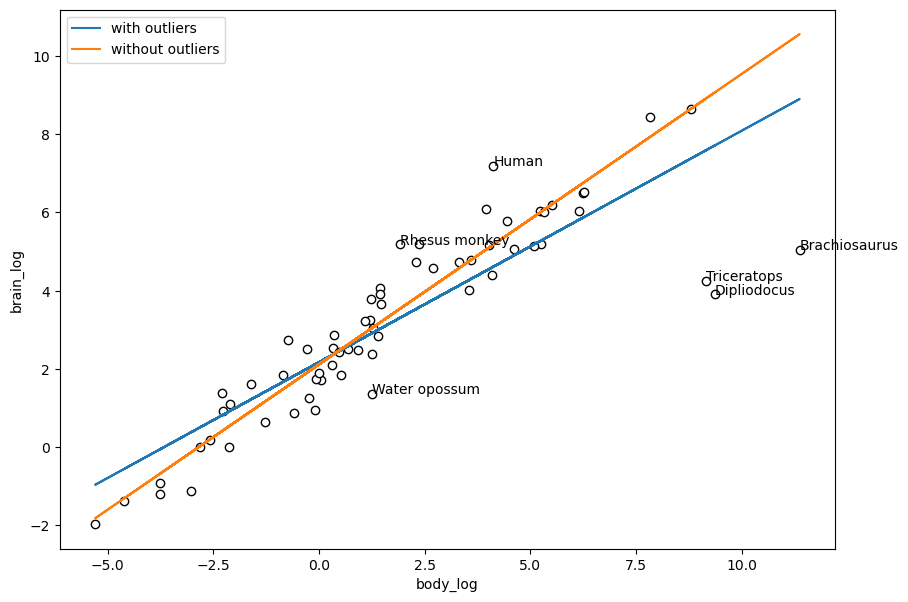

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(body_data_log, brain_data_log, c='w', edgecolors='k')
plt.plot(X, Y_p, label='with outliers')
plt.plot(X, Y_wo_p, label='without outliers')
for i in I2_o:
    plt.text(X[i], Y[i], names[i])
plt.ylabel('brain_log')
plt.xlabel('body_log')
plt.legend()
plt.show()

In [46]:
lrgr2_wo = linear_model.LinearRegression()

In [47]:
lrgr2_wo.fit(Xs2_wo, Y2_wo)

LinearRegression()

In [48]:
Y2_wo_p = lrgr2_wo.predict(Xs)

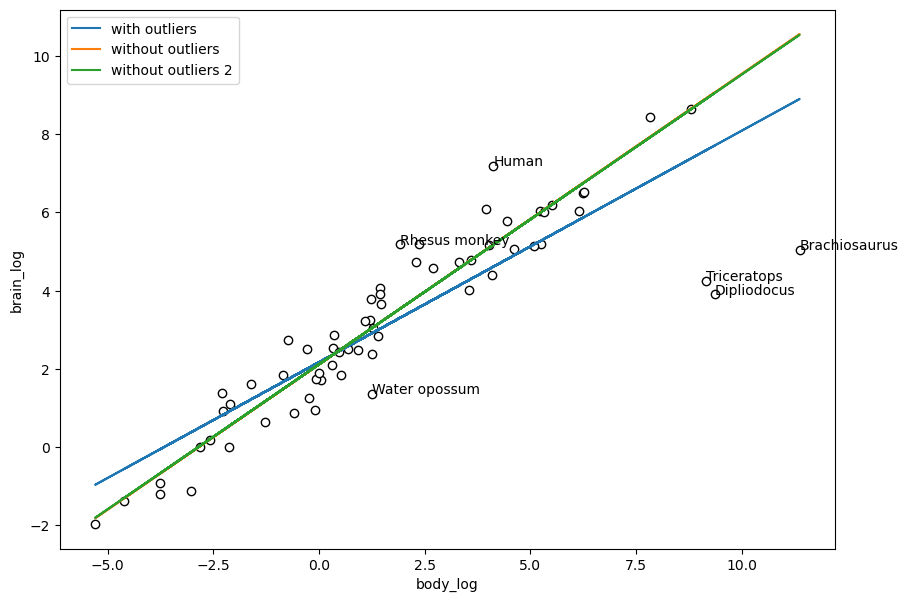

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(body_data_log, brain_data_log, c='w', edgecolors='k')
plt.plot(X, Y_p, label='with outliers')
plt.plot(X, Y_wo_p, label='without outliers')
plt.plot(X, Y2_wo_p, label='without outliers 2')
plt.ylabel('brain_log')
plt.xlabel('body_log')
plt.legend()
plt.show()

In [42]:
E2_wo = np.abs(Y - Y2_wo_p)
E2_wo.sort()

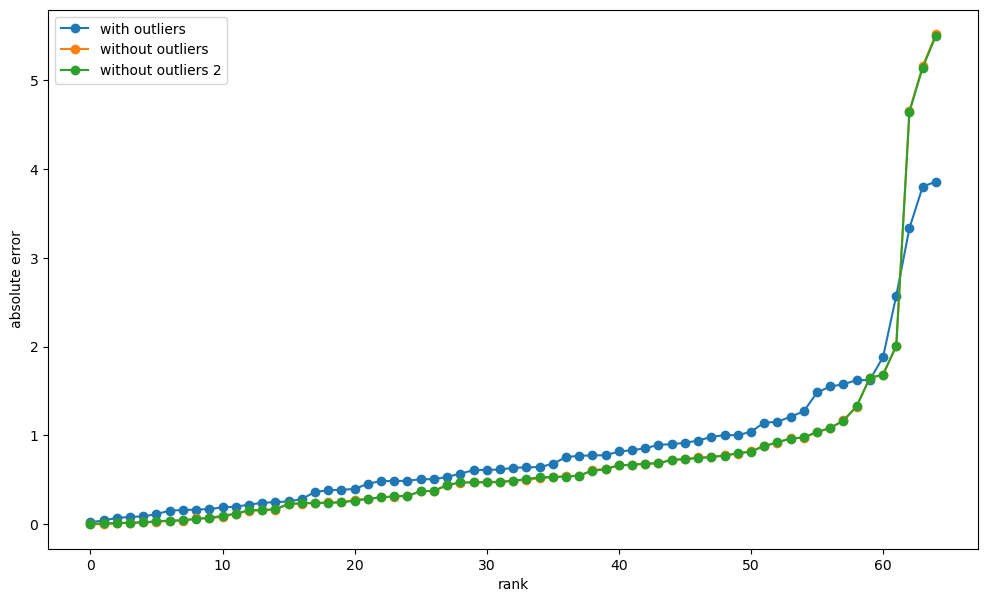

In [43]:
plt.figure(figsize=(12,7))
plt.plot(E, marker='o', label='with outliers')
plt.plot(E_wo, marker='o', label='without outliers')
plt.plot(E2_wo, marker='o', label='without outliers 2')
plt.xlabel('rank')
plt.ylabel('absolute error')
plt.legend()
plt.show()

In [44]:
for alg in [lrgr, lrgr_wo, lrgr2_wo]:
    print(alg.intercept_, alg.coef_)

2.1716854571040893 [0.59151984]
2.115004566015071 [0.7422766]
2.117983998718085 [0.74040756]


#### Задача 7

1. Загрузить данные из набора данных **cancer**
2. Визуализировать их
3. Применить логарифмическое преобразование для приведения их к сопоставимым по масштабам значений.
4. Найти линейную зависимость.
5. Попытаться идентифицировать выбросы по распределению абсолютных значений ошибок.
6. Исключить найденные выбросы из исходных данных и восстановить линейную зависимость без них.
7. Сравнить на графике полученные зависимости и распределения ошибок.

In [49]:
# X = np.log(X)
# Y = np.log(Y+1)

In [51]:
df_cancer = pd.read_csv("data/cancer.csv", sep=",")

In [52]:
df_cancer_log = np.log(df_cancer)

/home/intellimath/.local/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [53]:
# Исключается строка с переполнением
df_cancer_log.drop(index=1, inplace=True)

In [54]:
df_cancer_log

,cancer,population
0,0.000000,6.098074
2,1.098612,6.517671
3,1.386294,6.523562
4,1.098612,6.614726
5,1.386294,6.767343
...,...,...
296,5.521461,11.049794
297,5.587249,11.058417
298,5.497168,11.107600
299,5.513429,11.211888


In [55]:
X = df_cancer_log['cancer'].values
Y = df_cancer_log['population'].values

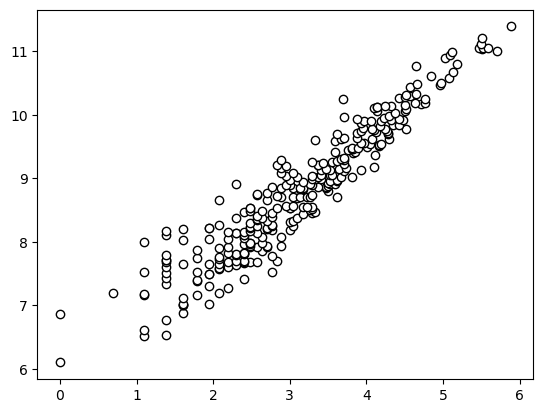

In [57]:
plt.scatter(X, Y, c='w', edgecolors='k')
plt.show()